In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

2024-02-26 15:23:58.308092: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 15:23:58.308202: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 15:23:58.463383: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Data preparation**

In [2]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
train_y = train['label']
train_x = train.drop(labels = ['label'], axis=1)
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


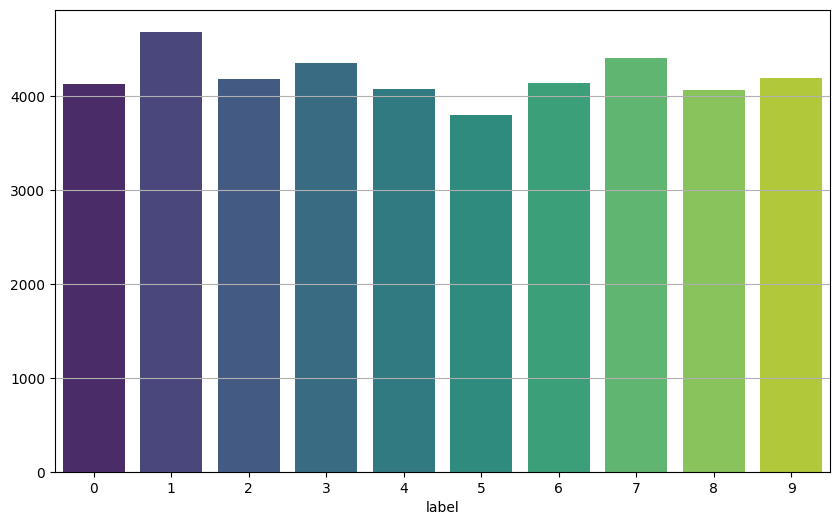

In [4]:
value_counts = train_y.value_counts()
value_counts = value_counts.sort_index()

train_y.value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.xticks(value_counts.index)
plt.grid(axis='y')
plt.show()

**Missing values**

In [5]:
missing_val_count_by_column = train.isnull().sum()
print('Columns with missing values:')
print(missing_val_count_by_column[missing_val_count_by_column>0])

Columns with missing values:
Series([], dtype: int64)


**Normalization**

In [6]:
train_x = train_x / 255.0
test = test / 255.0

**Reshape in 3D (28x28x1)**

In [7]:
train_x = train_x.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

**Encoding**

In [8]:
train_y = to_categorical(train_y, num_classes = 10)

**Split dataset**

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(train_x, train_y, test_size = 0.1, random_state=2)

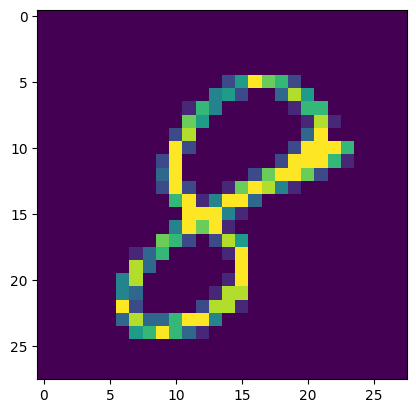

In [10]:
g = plt.imshow(X_train[0][:,:,0])

**Set the model**

In [11]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [12]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, Y_train, batch_size = 86, epochs = 1, 
         validation_data = (X_val, Y_val), verbose = 2)

440/440 - 102s - loss: 0.2455 - accuracy: 0.9235 - val_loss: 0.1170 - val_accuracy: 0.9619 - 102s/epoch - 233ms/step


**Evalutaion**

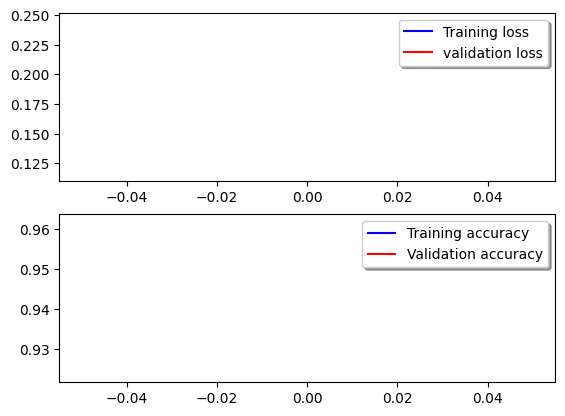

In [13]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**Results**

In [14]:
predictions = model.predict(test)

# select the indix with the maximum probability
predictions = np.argmax(predictions,axis = 1)

predictions = pd.Series(predictions,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predictions],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)

875/875 [==============================] - 20s 23ms/step
